# Step-1: Collection of Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING.

Source: https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv

In [117]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [118]:
#reading data
df = pd.read_csv("mcdonalds.csv")

In [119]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Step-2 Exploring Data

In [120]:
# Converting data of Yes/No data into numerical inputs
# Yes == 1
# No == 0

df["yummy"] = (df["yummy"] == "Yes").astype(int)
df["convenient"] = (df["convenient"] == "Yes").astype(int)
df["spicy"] = (df["spicy"] == "Yes").astype(int)
df["fattening"] = (df["fattening"] == "Yes").astype(int)
df["greasy"] = (df["greasy"] == "Yes").astype(int)
df["fast"] = (df["fast"] == "Yes").astype(int)
df["cheap"] = (df["cheap"] == "Yes").astype(int)
df["tasty"] = (df["tasty"] == "Yes").astype(int)
df["expensive"] = (df["expensive"] == "Yes").astype(int)
df["healthy"] = (df["healthy"] == "Yes").astype(int)
df["disgusting"] = (df["disgusting"] == "Yes").astype(int)

In [121]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [122]:
# Mean of the columns with Yes or No

round(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]].mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

#### Insights
| Attribute   | % of Yes |
|-------------|----------|
| Yummy       | 55%      |
| Convenient  | 91%      |
| Spicy       | 09%      |
| Fattening   | 87%      |
| Greasy      | 53%      |
| Fast        | 90%      |
| Cheap       | 60%      |
| Tasty       | 64%      |
| Expensive   | 36%      |
| Healthy     | 20%      |
| Disgusting  | 24%      |

## Principle Components analysis of the fast food data

In [123]:
pca = PCA()

# Fit PCA to your data
MD_pca = pca.fit_transform(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]])

# Summary of PCA
summary = pd.DataFrame({
    'Standard deviation': pca.explained_variance_,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
})

print(summary)


    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.573124                0.299447               0.299447
1             0.369002                0.192797               0.492244
2             0.254641                0.133045               0.625290
3             0.159040                0.083096               0.708386
4             0.113842                0.059481               0.767866
5             0.096270                0.050300               0.818166
6             0.083925                0.043849               0.862015
7             0.075692                0.039548               0.901563
8             0.070358                0.036761               0.938323
9             0.061922                0.032353               0.970677
10            0.056123                0.029323               1.000000


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [124]:
# Assuming MD_pca is the result of PCA transformation
# and pca is the PCA object fitted to your data

print("Principal Components:")
print(pca.components_)

print("\nExplained Variances:")
print(pca.explained_variance_.round(1))


Principal Components:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.113

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

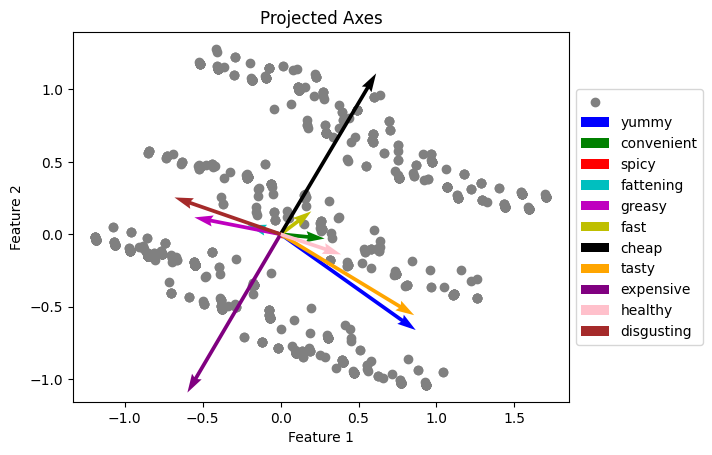

In [125]:
# Plotting the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Projecting axes
pca = PCA()
pca.fit(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]])

# Getting the principal components
PC_axes = pca.components_[:2]

# Plotting the projected axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Projected Axes')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown']

# Plotting the quivers for each attribute with adjusted orientation and thinner arrows
for i, attribute in enumerate(["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]):
    plt.quiver(0, 0, -PC_axes[0][i], -PC_axes[1][i], color=colors[i], angles='xy', scale_units='xy', scale=0.55, linewidth=0.5)
    

# Create legend
plt.legend(['',"yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()